# Cross-validation and polynomial regression

## Polynomial regression

Polynomial regression consists of fitting some data $(x, y)$ to a $n$-order polynomial of the form:

$$
 y = f(x) = b + w_1 \cdot x + w_2 \cdot x^2 + ... + w_n \cdot x^n
$$
 
By rewriting the unidimensional input $x$ into the following vector:

$$
 \mathbf{x} = \begin{bmatrix} x & x^2 & ... & x^n \end{bmatrix}^T
$$

and the weight vector as:

$$
 \mathbf{w} = \begin{bmatrix} w_1 & w_2 & ... & w_n \end{bmatrix}^T
$$
 
the problem can be reduced to linear regression:

$$
 y = \langle \mathbf{w} \cdot \mathbf{x} \rangle + b
$$
 
 and we can apply the delta learning rule to find $\mathbf{w}$ and $b$:

$$
 \Delta \mathbf{w} =  \eta \, (t_i - y_i ) \, \mathbf{x_i}
$$
$$
 \Delta b =  \eta \cdot (t_i - y_i ) 
$$

A first method to perform polynomial regression would be to adapt the code you wrote in the last exercise session for linear regression. However, you saw that properly setting the correct learning rate can be quite tricky. 

The solution retained for this exercise is to use the built-in functions of Numpy which can already perform polynomial regression in an optimized and proved-sure manner (Note: NumPy does not use gradient descent, but rather directly minimizes the error-function by inversing the Gram matrix).

```python
w = np.polyfit(X, t, deg)
```

This function takes the inputs $X$, the desired outputs $t$ and the desired degree of the polynomial `deg`, performs the polynomial regression and returns the adequate set of weights (beware: the higher-order coefficient comes first, the bias is last).

Once the weights are obtained, one can use them to predict the value of an example with the function:

```python
y = np.polyval(w, X)
```

*Note:* if you prefer to use scikit-learn, check <https://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html> but see <https://towardsdatascience.com/polynomial-regression-with-scikit-learn-what-you-should-know-bed9d3296f2> for why it may be a bad idea.

Let's start by importing the usual stuff and create a dataset of 16 samples generated using the function $x \, \sin x$ plus some noise:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Just to avoid the annoying warnings, please ignore
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
 
def create_dataset(N, noise):
    "Creates a dataset of N points generated from x*sin(x) plus some noise."
    
    x = np.linspace(0, 10, 300)
    rng = np.random.default_rng()
    rng.shuffle(x)
    x = np.sort(x[:N])
    t = x * np.sin(x) + noise*rng.uniform(-1.0, 1.0, N)
    
    return x, t

N = 16
X, t = create_dataset(N, noise=0.2)

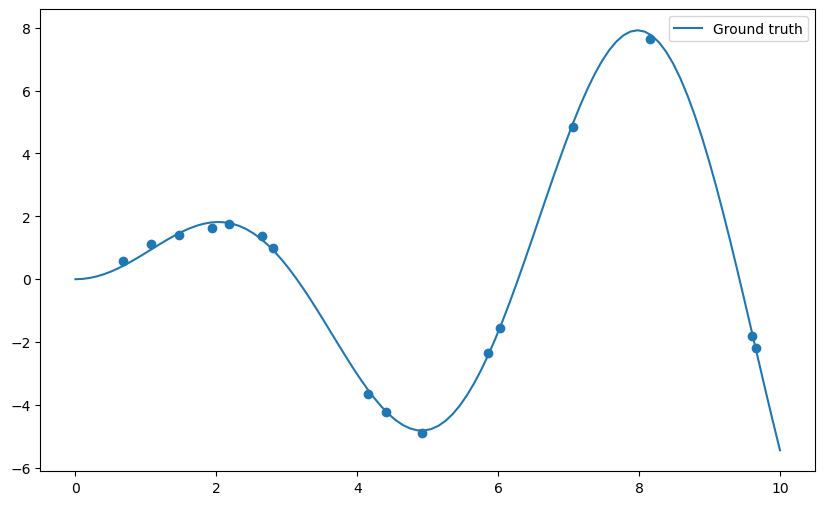

In [2]:
x = np.linspace(0, 10, 100)

plt.figure(figsize=(10, 6))
plt.plot(x, x*np.sin(x), label="Ground truth")
plt.scatter(X, t)
plt.legend()
plt.show()

**Q:** Apply the `np.polyfit()` function on the data and visualize the result for different degrees of the polynomial (from 1 to 20 or even more). What do you observe? Find a polynomial degree which clearly overfits.

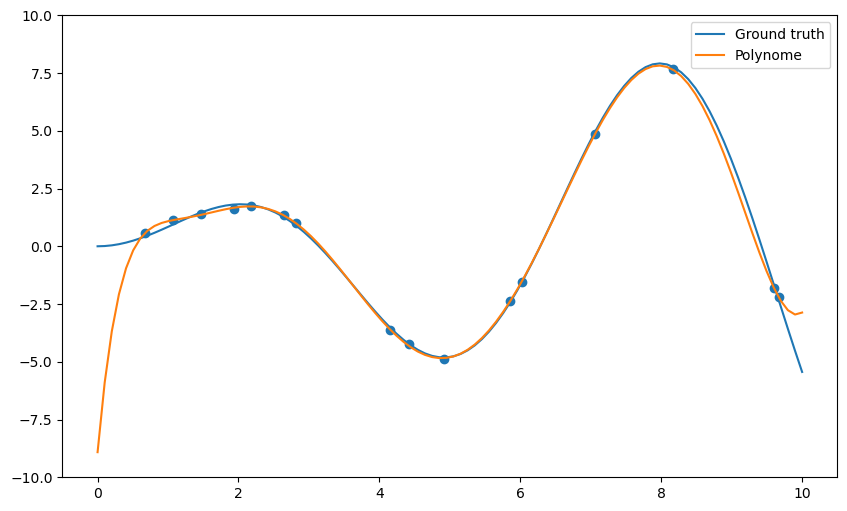

In [3]:
deg = 10

# Polynomial regression
w = np.polyfit(X, t, deg)

# Inference on the training set
y = np.polyval(w, x)

plt.figure(figsize=(10, 6))
plt.plot(x, x*np.sin(x), label="Ground truth")
plt.plot(x, y, label="Polynome")
plt.scatter(X, t)
plt.ylim((-10., 10.))
plt.legend()
plt.show()

**Q:** Plot the mean square error on the training set for all polynomial regressions from 1 to 20. How does the training error evolve when the degree of the polynomial is increased? What is the risk by taking the hypothesis with the smallest training error? 

Degree 1 : training error 10.274204778733381
Degree 2 : training error 9.709173361163781
Degree 3 : training error 8.09123728904698
Degree 4 : training error 0.5404291665057327
Degree 5 : training error 0.3690073749646534
Degree 6 : training error 0.03207848974758999
Degree 7 : training error 0.01064525843744625
Degree 8 : training error 0.004907542553690309
Degree 9 : training error 0.0013711599670661694
Degree 10 : training error 0.0012830500074876936
Degree 11 : training error 0.0012631624438231757
Degree 12 : training error 0.0011577189777466992
Degree 13 : training error 0.00044112886535457136
Degree 14 : training error 0.00013485786820133358
Degree 15 : training error 1.9960349081435425e-10
Degree 16 : training error 7.945219917680017e-12
Degree 17 : training error 1.2654740097278693e-11
Degree 18 : training error 1.1306191398291718e-11
Degree 19 : training error 1.721113663392047e-12
Degree 20 : training error 6.979177197843328e-13


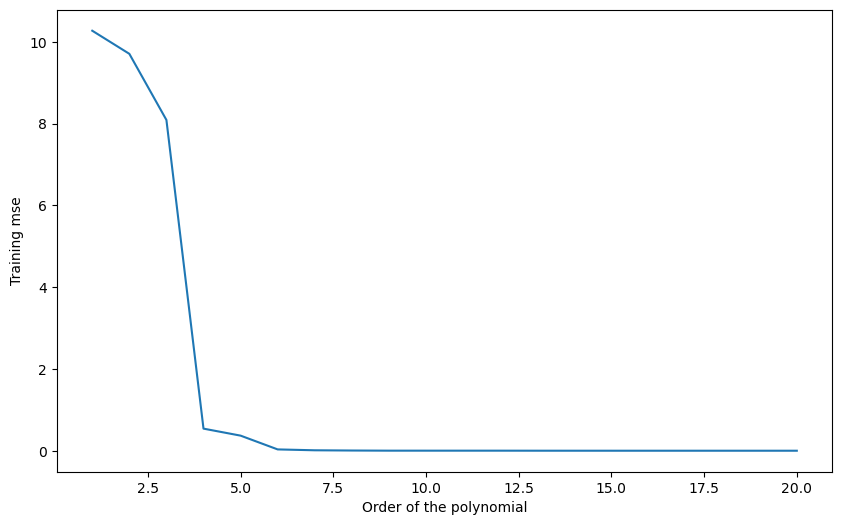

In [4]:
training_mse = []

degrees = range(1, 21)

for deg in degrees:
    
    w = np.polyfit(X, t, deg)
    y = np.polyval(w, X)
    
    mse = np.mean((t-y)**2)
    
    training_mse.append(mse)
    
    print("Degree", deg, ": training error", mse)
    
plt.figure(figsize=(10, 6))
plt.plot(degrees, training_mse)
plt.xlabel("Order of the polynomial")
plt.ylabel("Training mse")
plt.show()

**A:** the more complex the model, the smaller the training error.

## Simple hold-out cross-validation

You will now apply **simple hold-out cross-validation** to find the optimal degree for the polynomial regression. You will need to separate the data set into a training set $S_{\text{train}}$ (70% of the data) and a test set $S_{\text{test}}$ (the remaining 30%). 

The data (X, t) could be easily split into two sets of arrays using slices of indices, as the data is already randomized:

```python
N_train = int(0.7*N)
X_train, t_train = X[:N_train], t[:N_train]
X_test, t_test = X[N_train:], t[N_train:]
```

A much more generic approach is to use the library `scikit-learn` (<https://www.scikit-learn.org>), which provides a method able to split any dataset randomly. 

You can import the method `train_test_split()` from its module:

In [5]:
from sklearn.model_selection import train_test_split

The doc of the function is available at: <https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html>.

**Q:** Use scikit-learn to split the data into the corresponding training and test sets. Train each polynomial from degree 1 to 20 on $S_{\text{train}}$ and plot the generalization error on $S_{\text{test}}$. Which degree of the polynomial gives the minimal empirical error? Why? Run the cross-validation split multiple times. Do you always obtain the same optimal degree? 

Degree 1 : empirical error 17.737825789749444
Degree 2 : empirical error 103.67328122192157
Degree 3 : empirical error 1710.4101461802875
Degree 4 : empirical error 1480.6931125337637
Degree 5 : empirical error 2322.5108741050435
Degree 6 : empirical error 15519.485234553344
Degree 7 : empirical error 60982.280758101515
Degree 8 : empirical error 419890.71579648694
Degree 9 : empirical error 116370258.1759038
Degree 10 : empirical error 95167.92378262678
Degree 11 : empirical error 124418893.58886096
Degree 12 : empirical error 1117867973.9844458
Degree 13 : empirical error 5691788266.150396
Degree 14 : empirical error 22609117517.22481
Degree 15 : empirical error 77628441043.31839
Degree 16 : empirical error 241313202803.36475
Degree 17 : empirical error 696410554086.0521
Degree 18 : empirical error 1894589708855.5083
Degree 19 : empirical error 4908332394875.045
Degree 20 : empirical error 12196570415801.32


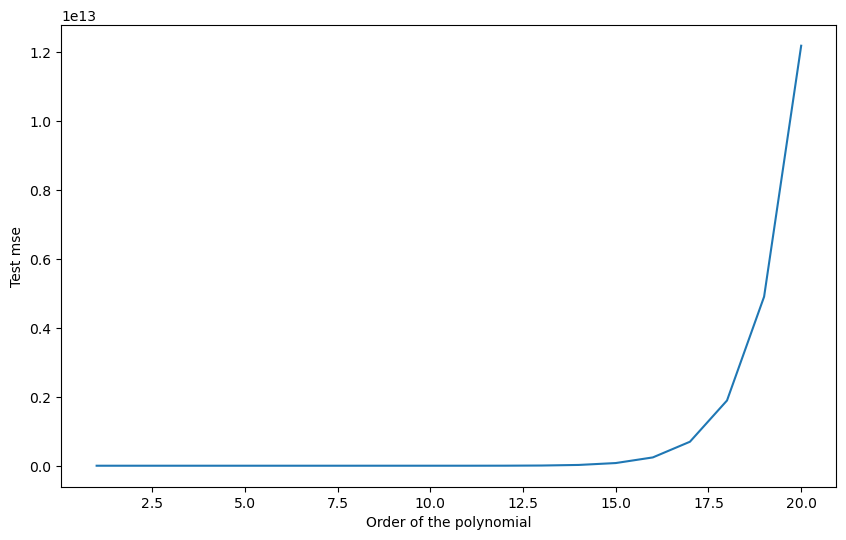

In [6]:
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3)

degrees = range(1, 21)

test_mse = []

for deg in degrees:
    # Train on the training set
    w = np.polyfit(X_train, t_train, deg)
    
    # Test on the test set
    y_test = np.polyval(w, X_test)
    mse = np.mean((t_test-y_test)**2)
    test_mse.append(mse)
    
    print("Degree", deg, ": empirical error", mse)
    
plt.figure(figsize=(10, 6))
plt.plot(degrees, test_mse)
plt.xlabel("Order of the polynomial")
plt.ylabel("Test mse")
plt.show()

**A:** Depending on the split, the optimal degree is around 6 or 7. This variability is because some samples of the test set might better fit with a given polynomial, depending on how the split was made.  

## k-fold cross-validation

As we only have 16 samples to learn from, it is quite annoying to "lose" 5 of them for the test set. Here we can afford to use **k-fold cross-validation**, where the cross-validation split is performed $k$ times:

* The dataset is split into $k$ subsets of equal size (if possible).
* Each subset is iteratively used as the test set, while the $k-1$ other ones are used as a training set.
* The final empirical error is the average of the mse on all subsets.

It would be possible to make the splits using indices too, but it is much easier to use `scikit-learn` once again. You can import the `KFold` class like this:

In [7]:
from sklearn.model_selection import KFold

k = 4
kf = KFold(n_splits=k, shuffle=True)

`n_splits` corresponds to $k$: how many times the dataset is split. We can take $k=4$ for example (4 subsets of 4 samples).

**Q:** Check the doc of `KFold` (<https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html>). Print the indices of the examples of the training and test sets for each iteration of the algorithm. Change the value of $k$ to understand how it works.

In [8]:
for train_index, test_index in kf.split(X, t):
    print("Train:", train_index)
    print("Test:", test_index)
    print('-------')

Train: [ 0  1  2  3  5  6  7  9 11 12 13 14]
Test: [ 4  8 10 15]
-------
Train: [ 0  1  2  4  7  8  9 10 12 13 14 15]
Test: [ 3  5  6 11]
-------
Train: [ 1  2  3  4  5  6  8  9 10 11 13 15]
Test: [ 0  7 12 14]
-------
Train: [ 0  3  4  5  6  7  8 10 11 12 14 15]
Test: [ 1  2  9 13]
-------


**Q:** Apply k-fold cross-validation on the polynomial regression problem. Which polynomial degree is the best? Run the split multiple times: does the best polynomial degree change?

1 13.562751940410832
2 14.713496738455476
3 24.82014179863441
4 4.175248037547588
5 7.247526852721607
6 1.1432470774774588
7 1.0314308257048825
8 1.0639454952280638
9 16.22674706470375
10 211.47523426851566
11 16087.212340808519
12 11585.777418550013
13 11950.94075926862
14 16340.05563177343
15 25539.303136820836
16 41646.41889691555
17 68253.3076712327
18 110947.03900311817
19 178103.3573811868
20 282005.89839864505


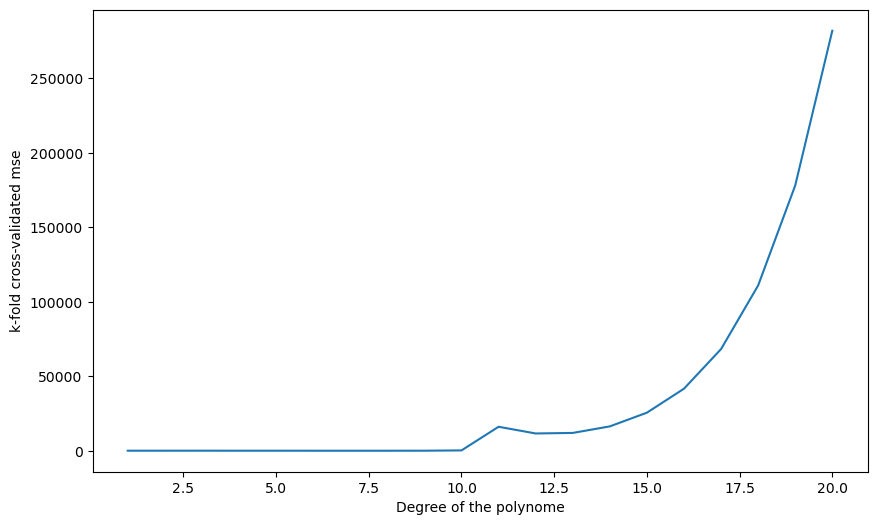

In [9]:
k = 4
kf = KFold(n_splits=k, shuffle=True)

degrees = range(1, 21)

test_mse = []

for train_index, test_index in kf.split(X, t):
    
    split_mse = []
    
    for deg in degrees:
        
        w = np.polyfit(X[train_index], t[train_index], deg)
        y = np.polyval(w, X[test_index])
        
        mse = np.mean((t[test_index] - y)**2)
        split_mse.append(mse)
    
    test_mse.append(split_mse)
        
test_mse = np.mean(test_mse, axis=0)

for deg, mse in zip(degrees, test_mse):
    print(deg, mse)

plt.figure(figsize=(10, 6))
plt.plot(degrees, test_mse)
plt.xlabel("Degree of the polynome")
plt.ylabel("k-fold cross-validated mse")
plt.show()

**A:** A polynomial of order between 6 and 8 still seems the best, but it varies from run to run (as well as on the data, you may observe something different).

**Q:** Change $k$ to $N$. How stable are the results between two runs?

1 13.348131501219997
2 15.08662090437851
3 16.08445796889914
4 1.6633024230833438
5 2.4917837753099517
6 0.44740387679561966
7 0.21066089349204142
8 0.23578580423025874
9 0.04318657663911864
10 0.1478849633359534
11 3.819514305449779
12 3053.5123255907865
13 33498.42952884926
14 1790588.7747749123
15 3803801.4510281147
16 8050477.938297476
17 16903553.234326087
18 35077229.578823954
19 71699649.38370422
20 143966343.4979507


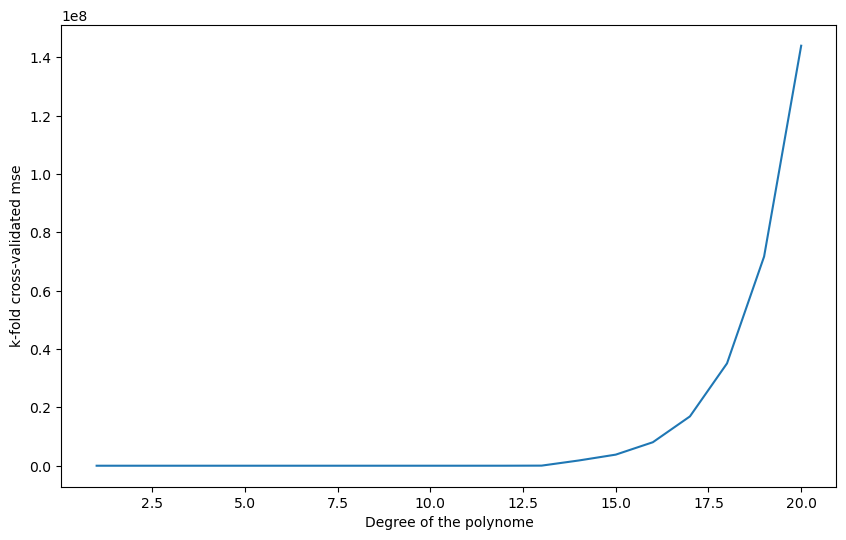

In [10]:
k = N
kf = KFold(n_splits=k, shuffle=True)

degrees = range(1, 21)

test_mse = []

for train_index, test_index in kf.split(X, t):
    
    split_mse = []
    
    for deg in degrees:
        
        w = np.polyfit(X[train_index], t[train_index], deg)
        y = np.polyval(w, X[test_index])
        
        mse = np.mean((t[test_index] - y)**2)
        split_mse.append(mse)
    
    test_mse.append(split_mse)
        
test_mse = np.mean(test_mse, axis=0)

for deg, mse in zip(degrees, test_mse):
    print(deg, mse)

plt.figure(figsize=(10, 6))
plt.plot(degrees, test_mse)
plt.xlabel("Degree of the polynome")
plt.ylabel("k-fold cross-validated mse")
plt.show()

**A:** With $k=N$ (one sample in the test set every time), the results are more stable. It is called **leave-one-out cross-validation** (LOOCV). It is the best cross-validation you can make in terms of bias (you use almost all your data to learn), but it is very expensive (you have to retrain your algorithm for each sample) and the empirical error has a high variance.

**Q:** Regenerate the data with a noise equal to 0.0 and re-run all experiments. What does it change?

**A:** Without noise, higher-order polynomials are a better fit. This is because the $x \, \sin x$ can be "naturally" approximated by polynomials (Taylor series).